<a href="https://colab.research.google.com/github/haan-doobey/Two_Phase_Rel_Perm_Curve_Fitting/blob/main/Two_Phase_Rel_Perm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

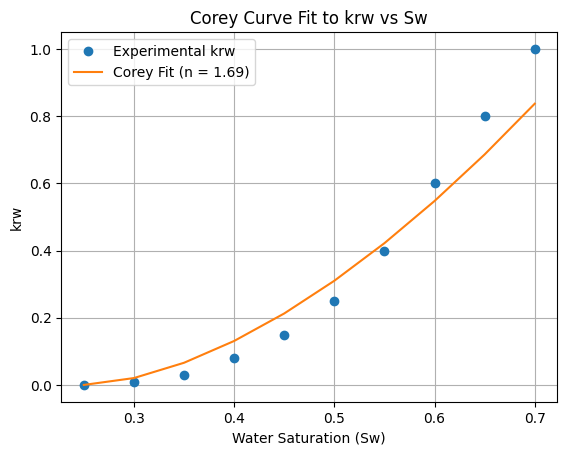

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Sample Sw and krw (can be replaced with your real data)
Sw = np.array([0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70])
krw_exp = np.array([0.00, 0.01, 0.03, 0.08, 0.15, 0.25, 0.40, 0.60, 0.80, 1.00])

# Define Corey model
def corey_krw(Sw, n_w, Swc=0.25, Sor=0.25, krw_end=1.0):
    Sw_norm = (Sw - Swc) / (1 - Swc - Sor)
    Sw_norm = np.clip(Sw_norm, 0, 1)  # Ensure normalized values stay between 0–1
    return krw_end * Sw_norm**n_w

# Fit the curve
popt, pcov = curve_fit(lambda Sw, n_w: corey_krw(Sw, n_w), Sw, krw_exp, p0=[3])
n_w_fitted = popt[0]

# Generate fitted krw
krw_fitted = corey_krw(Sw, n_w_fitted)

# Plot
plt.plot(Sw, krw_exp, 'o', label='Experimental krw')
plt.plot(Sw, krw_fitted, '-', label=f'Corey Fit (n = {n_w_fitted:.2f})')
plt.xlabel('Water Saturation (Sw)')
plt.ylabel('krw')
plt.title('Corey Curve Fit to krw vs Sw')
plt.legend()
plt.grid(True)
plt.show()


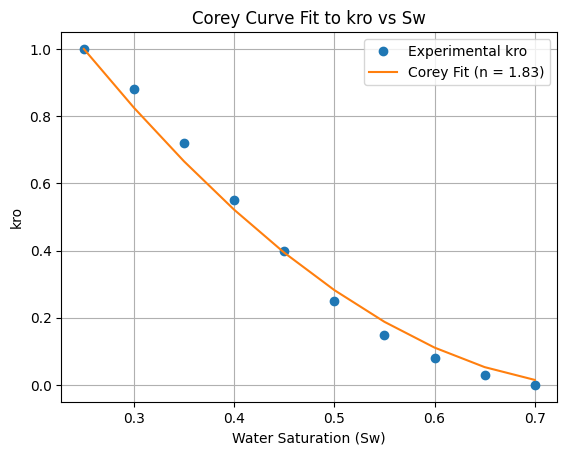

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Sample Sw and kro data (replace with real core flood data if available)
Sw = np.array([0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70])
kro_exp = np.array([1.00, 0.88, 0.72, 0.55, 0.40, 0.25, 0.15, 0.08, 0.03, 0.00])

# Corey model function for kro
def corey_kro(Sw, n_o, Swc=0.25, Sor=0.25, kro_end=1.0):
    So_norm = (1 - Sw - Sor) / (1 - Swc - Sor)
    So_norm = np.clip(So_norm, 0, 1)  # keep in valid range
    return kro_end * So_norm**n_o

# Fit Corey exponent n_o to experimental data
popt, _ = curve_fit(lambda Sw, n_o: corey_kro(Sw, n_o), Sw, kro_exp, p0=[3])
n_o_fitted = popt[0]
kro_fitted = corey_kro(Sw, n_o_fitted)

# Plotting
plt.plot(Sw, kro_exp, 'o', label='Experimental kro')
plt.plot(Sw, kro_fitted, '-', label=f'Corey Fit (n = {n_o_fitted:.2f})')
plt.xlabel('Water Saturation (Sw)')
plt.ylabel('kro')
plt.title('Corey Curve Fit to kro vs Sw')
plt.legend()
plt.grid(True)
plt.show()


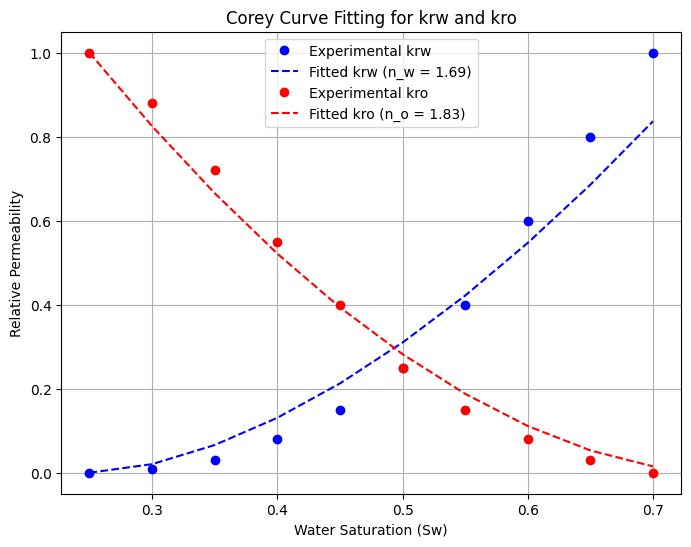

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Sample Sw and experimental krw, kro data (can replace with real core flood data)
Sw = np.array([0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70])
krw_exp = np.array([0.00, 0.01, 0.03, 0.08, 0.15, 0.25, 0.40, 0.60, 0.80, 1.00])
kro_exp = np.array([1.00, 0.88, 0.72, 0.55, 0.40, 0.25, 0.15, 0.08, 0.03, 0.00])

# Corey model function for both krw and kro
def corey_model(Sw, n_w, n_o, Swc=0.25, Sor=0.25, krw_end=1.0, kro_end=1.0):
    Swn = (Sw - Swc) / (1 - Swc - Sor)
    Son = (1 - Sw - Sor) / (1 - Swc - Sor)
    Swn = np.clip(Swn, 0, 1)
    Son = np.clip(Son, 0, 1)
    krw = krw_end * Swn**n_w
    kro = kro_end * Son**n_o
    return np.concatenate([krw, kro])  # combined output for curve_fit

# Combined data vector for fitting
kr_combined = np.concatenate([krw_exp, kro_exp])

# Fit n_w and n_o
popt, _ = curve_fit(lambda Sw, n_w, n_o: corey_model(Sw, n_w, n_o), Sw, kr_combined[:len(Sw)*2], p0=[2, 2])
n_w_fit, n_o_fit = popt

# Generate fitted curves
Swn = (Sw - 0.25) / (1 - 0.25 - 0.25)
Son = (1 - Sw - 0.25) / (1 - 0.25 - 0.25)
Swn = np.clip(Swn, 0, 1)
Son = np.clip(Son, 0, 1)
krw_fit = Swn**n_w_fit
kro_fit = Son**n_o_fit

# Plot
plt.figure(figsize=(8, 6))
plt.plot(Sw, krw_exp, 'bo', label='Experimental krw')
plt.plot(Sw, krw_fit, 'b--', label=f'Fitted krw (n_w = {n_w_fit:.2f})')
plt.plot(Sw, kro_exp, 'ro', label='Experimental kro')
plt.plot(Sw, kro_fit, 'r--', label=f'Fitted kro (n_o = {n_o_fit:.2f})')
plt.xlabel('Water Saturation (Sw)')
plt.ylabel('Relative Permeability')
plt.title('Corey Curve Fitting for krw and kro')
plt.grid(True)
plt.legend()
plt.show()


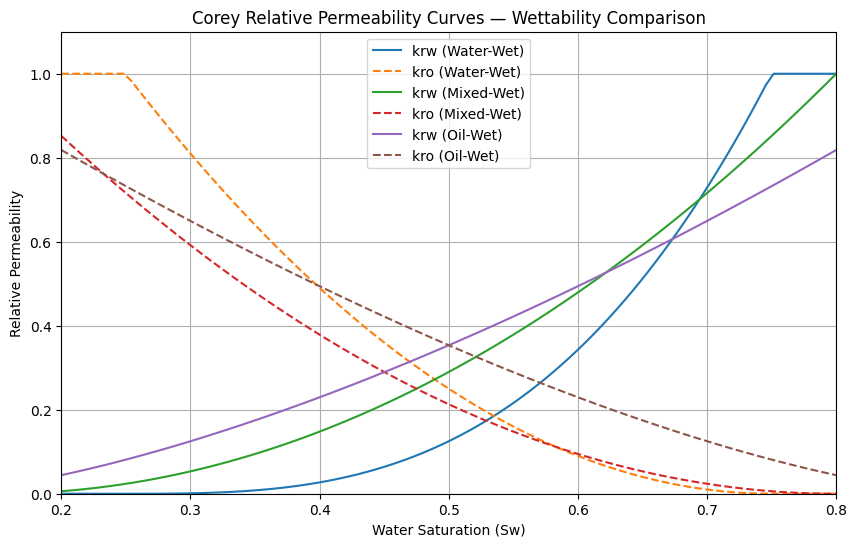

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Saturation range
Sw = np.linspace(0.2, 0.8, 100)

# Define a function to compute Corey curves
def corey_relperm(Sw, Swc, Sor, n_w, n_o, krw_end=1.0, kro_end=1.0):
    Swn = (Sw - Swc) / (1 - Swc - Sor)
    Son = (1 - Sw - Sor) / (1 - Swc - Sor)
    Swn = np.clip(Swn, 0, 1)
    Son = np.clip(Son, 0, 1)
    krw = krw_end * Swn**n_w
    kro = kro_end * Son**n_o
    return krw, kro

# Define wettability cases
cases = {
    "Water-Wet":   {"Swc": 0.25, "Sor": 0.25, "n_w": 3, "n_o": 2},
    "Mixed-Wet":   {"Swc": 0.15, "Sor": 0.20, "n_w": 2, "n_o": 2},
    "Oil-Wet":     {"Swc": 0.10, "Sor": 0.10, "n_w": 1.5, "n_o": 1.5},
}

# Plot
plt.figure(figsize=(10, 6))

for label, params in cases.items():
    krw, kro = corey_relperm(Sw, **params)
    plt.plot(Sw, krw, linestyle='-', label=f'krw ({label})')
    plt.plot(Sw, kro, linestyle='--', label=f'kro ({label})')

plt.xlabel('Water Saturation (Sw)')
plt.ylabel('Relative Permeability')
plt.title('Corey Relative Permeability Curves — Wettability Comparison')
plt.grid(True)
plt.legend()
plt.ylim(0, 1.1)
plt.xlim(0.2, 0.8)
plt.show()
